# 比率のP値函数達

* 黒木玄
* 2022-09-08
* [nbviewer版](https://nbviewer.org/github/genkuroki/public/blob/main/0036/P-value%20functions%20of%20proportions.ipynb)
* [repository版](https://github.com/genkuroki/public/blob/main/0036/P-value%20functions%20of%20proportions.ipynb)
* [ダウンロードPDF](https://github.com/genkuroki/public/raw/main/0036/P-value%20functions%20of%20proportions.pdf)
* [PDF版(repository)](https://github.com/genkuroki/public/blob/main/0036/P-value%20functions%20of%20proportions.pdf)
$
\newcommand\ds{\displaystyle}
\newcommand\op[1]{{\operatorname{#1}}}
\newcommand\R{{\mathbb R}}
\newcommand\pdf{\op{pdf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ccdf{\op{ccdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\cquantile{\op{cquantile}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\credint{\op{credint}}
\newcommand\phat{{\hat p}}
$

このノートでは $A$ の確率を $P(A)$ と表し, 確率変数 $X$ の函数 $f(X)$ の期待値を $E[f(X)]$ と表す.

__予備知識:__ 二項分布, 正規分布, ベータ分布. 終わりの方ではベイズ統計.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データと統計モデルの設定" data-toc-modified-id="データと統計モデルの設定-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データと統計モデルの設定</a></span></li><li><span><a href="#P値函数と信頼区間の一般論" data-toc-modified-id="P値函数と信頼区間の一般論-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>P値函数と信頼区間の一般論</a></span></li><li><span><a href="#累積分布函数-cdf-と分位点函数-quantile" data-toc-modified-id="累積分布函数-cdf-と分位点函数-quantile-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>累積分布函数 cdf と分位点函数 quantile</a></span><ul class="toc-item"><li><span><a href="#補累積分布函数-ccdf-と補分位点函数-cquantile" data-toc-modified-id="補累積分布函数-ccdf-と補分位点函数-cquantile-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>補累積分布函数 ccdf と補分位点函数 cquantile</a></span></li></ul></li><li><span><a href="#WilsonのP値と信頼区間" data-toc-modified-id="WilsonのP値と信頼区間-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>WilsonのP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#WilsonのP値" data-toc-modified-id="WilsonのP値-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>WilsonのP値</a></span></li><li><span><a href="#Wilsonの信頼区間" data-toc-modified-id="Wilsonの信頼区間-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Wilsonの信頼区間</a></span></li><li><span><a href="#WilsonのP値と信頼区間の実装例" data-toc-modified-id="WilsonのP値と信頼区間の実装例-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>WilsonのP値と信頼区間の実装例</a></span></li></ul></li><li><span><a href="#WaldのP値と信頼区間" data-toc-modified-id="WaldのP値と信頼区間-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>WaldのP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#WaldのP値" data-toc-modified-id="WaldのP値-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>WaldのP値</a></span></li><li><span><a href="#Waldの信頼区間" data-toc-modified-id="Waldの信頼区間-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Waldの信頼区間</a></span></li><li><span><a href="#WaldのP値と信頼区間の実装例" data-toc-modified-id="WaldのP値と信頼区間の実装例-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>WaldのP値と信頼区間の実装例</a></span></li></ul></li><li><span><a href="#Clopper-PearsonのP値と信頼区間" data-toc-modified-id="Clopper-PearsonのP値と信頼区間-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clopper-PearsonのP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#Clopper-PearsonのP値" data-toc-modified-id="Clopper-PearsonのP値-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Clopper-PearsonのP値</a></span></li><li><span><a href="#二項分布とベータ分布の関係" data-toc-modified-id="二項分布とベータ分布の関係-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>二項分布とベータ分布の関係</a></span></li><li><span><a href="#Clopper-Pearsonの信頼区間" data-toc-modified-id="Clopper-Pearsonの信頼区間-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間</a></span></li><li><span><a href="#Clopper-PearsonのP値と信頼区間の実装例" data-toc-modified-id="Clopper-PearsonのP値と信頼区間の実装例-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Clopper-PearsonのP値と信頼区間の実装例</a></span></li></ul></li><li><span><a href="#SterneのP値と信頼区間" data-toc-modified-id="SterneのP値と信頼区間-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>SterneのP値と信頼区間</a></span><ul class="toc-item"><li><span><a href="#SterneのP値と信頼区間" data-toc-modified-id="SterneのP値と信頼区間-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>SterneのP値と信頼区間</a></span></li><li><span><a href="#SterneのP値と信頼区間の実装例" data-toc-modified-id="SterneのP値と信頼区間の実装例-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>SterneのP値と信頼区間の実装例</a></span></li></ul></li><li><span><a href="#4種のP値函数と信頼区間を同時にプロット" data-toc-modified-id="4種のP値函数と信頼区間を同時にプロット-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>4種のP値函数と信頼区間を同時にプロット</a></span></li><li><span><a href="#ベイズ統計での信用区間に対応するP値函数" data-toc-modified-id="ベイズ統計での信用区間に対応するP値函数-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ベイズ統計での信用区間に対応するP値函数</a></span><ul class="toc-item"><li><span><a href="#二項分布モデルのHDI版信用区間" data-toc-modified-id="二項分布モデルのHDI版信用区間-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>二項分布モデルのHDI版信用区間</a></span></li><li><span><a href="#HDI版信用区間に対応するP値函数" data-toc-modified-id="HDI版信用区間に対応するP値函数-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>HDI版信用区間に対応するP値函数</a></span></li><li><span><a href="#HDI版の信用区間とベイズ版P値函数の実装例" data-toc-modified-id="HDI版の信用区間とベイズ版P値函数の実装例-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>HDI版の信用区間とベイズ版P値函数の実装例</a></span></li><li><span><a href="#WilsonのP値函数とベイズ版P値函数のHDI版の比較" data-toc-modified-id="WilsonのP値函数とベイズ版P値函数のHDI版の比較-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>WilsonのP値函数とベイズ版P値函数のHDI版の比較</a></span></li><li><span><a href="#ETI版の信用区間とそれに対応するP値函数" data-toc-modified-id="ETI版の信用区間とそれに対応するP値函数-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>ETI版の信用区間とそれに対応するP値函数</a></span></li><li><span><a href="#ETI版の信用区間とそれに対応するベイズ版P値函数の実装例" data-toc-modified-id="ETI版の信用区間とそれに対応するベイズ版P値函数の実装例-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>ETI版の信用区間とそれに対応するベイズ版P値函数の実装例</a></span></li><li><span><a href="#WilsonのP値函数とベイズ版P値函数のETI版の比較" data-toc-modified-id="WilsonのP値函数とベイズ版P値函数のETI版の比較-9.7"><span class="toc-item-num">9.7&nbsp;&nbsp;</span>WilsonのP値函数とベイズ版P値函数のETI版の比較</a></span></li><li><span><a href="#道具を主義の色眼鏡で見ることの不合理性" data-toc-modified-id="道具を主義の色眼鏡で見ることの不合理性-9.8"><span class="toc-item-num">9.8&nbsp;&nbsp;</span>道具を主義の色眼鏡で見ることの不合理性</a></span></li></ul></li></ul></div>

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, size=(500, 300),
    titlefontsize=10, tickfontsize=6, guidefontsize=9)

# Sterneの信頼区間の定義で使用
using Roots
using StatsFuns: logit

# highest density interval (HDI) の構成で使用
using Optim

## データと統計モデルの設定

当たりまたは外れの目が出るルーレットを $n$ 回まわしたとき当たりが $k$ 回出たと仮定する.

このとき「$n$ 回中当たりが $k$ 回」をこのルーレットに関するデータと呼ぶ.

そのデータの確率的揺らぎのモデルとして, 二項分布を考える.

すなわち, 次の確率質量函数で定義される $k$ に関する確率分布を考える:

$$
P(k|n,p) = \binom{n}{k} p^k (1-p)^{n-k} \quad (k=0,1,\ldots,n).
$$

ここで, $0\le p\le 1$ であり, $\ds\binom{n}{k}$ は次で定義される二項係数である:

$$
\binom{n}{k} = \frac{n(n-1)\cdots(n-k+1)}{k!} = \frac{n!}{k!(n-k)!}.
$$

## P値函数と信頼区間の一般論

以下では具体的な数値 $p_0$ に関する仮説「当たりが出る確率は $p$ である」と「$n$ 回中当たりが $k$ 回」というデータの __両立性__ (compatibility)もしくは __整合性__ (consistency)の指標の1つである(両側検定の) __P値__ (P-value)を複数定義して比較してみる.

以下ではそのP値を $\pvalue(k|n,p=p_0)$ のように書くことにする.

データ「$n$ 回中当たりが $k$ 回」が与えられたときに, パラメータ値 $p$ に $\pvalue(k|n,p=p_0)$ を対応させる函数

$$
p \mapsto \pvalue(k|n,p)
$$

をデータ「$n$ 回中当たりが $k$ 回」に関する __P値函数__ (P-value function)と呼ぶ.

P値函数のグラフは, 与えられたデータとパラメータ値 $p$ の両立性の様子の全体の視覚化になっている.

$0\le\alpha\le 1$ と仮定する.  $\alpha$ は __有意水準__ (significance level)と呼ばれる.

データ「$n$ 回中当たりが $k$ 回」のP値函数が与えられたとき, パラメータ $p$ に関する __信頼度__ (confidence level) $1-\alpha$ の __信頼区間__ (confidence interval)が次によって定義される:

$$
\confint(k|n,\alpha) = \{\,p\mid \pvalue(k|n,p) \ge \alpha\,\}.
$$

すなわち, データ「$n$ 回中当たりが $k$ 回」に関するパラメータ $p$ の信頼度 $1-\alpha$ の信頼区間は, データの数値とパラメータ値 $p$ の両立性の指標であるP値が最初に決めておいた閾値 $\alpha$ 以上になるような値 $p=p_0$ 全体の集合である.

この集合が区間にならない場合には, この集合を含む最小の区間を信頼区間と定義することもある.

## 累積分布函数 cdf と分位点函数 quantile

確率分布 $D$ に従う確率変数 $X$ に対して, $x\in\R$ の函数

$$
\cdf(D, x) = P(X\le x)
$$

を分布 $D$ の __累積分布函数__ (cumulative distribution function, __cdf__)と呼ぶ.

例えば, 試行回数 $n$, 成功確率 $p$ の二項分布 $\op{Binomial}(n,p)$ の累積分布函数は次のように表される:

$$
\cdf(\op{Binomial}(n,p), x) = \sum_{k\le x}\binom{n}{k}p^k(1-p)^{n-k}.
$$

例えば, 平均 $\mu$, 標準偏差 $\sigma$ の正規分布 $\op{Normal}(\mu,\sigma)$ の累積分布函数は次のように表される:

$$
\cdf(\op{Normal}(\mu,\sigma), x) =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^t \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dt.
$$

もしも, 累積分布函数 $p = \cdf(D,x)$ の逆函数が存在するならば, それを

$$
x = \quantile(D, p)
$$

と表し, 分布 $D$ の __分位点函数__ (quantile function)と呼ぶ.

例えば, 正規分布の累積分布函数は狭義単調増加函数なので, 分位点函数 $x = \quantile(\op{Normal}(\mu,\sigma),p)$ が定義される.

累積分布函数の逆函数が存在しない場合にも, その代わりとなる便利な函数が定義可能な場合には, それも分位点函数と呼び, 同じ記号で表す.

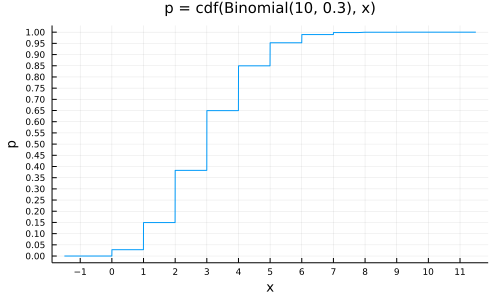

In [2]:
plot(x -> cdf(Binomial(10, 0.3), x), -1.5, 11.5; label="")
plot!(xtick=-1:11, ytick=0:0.05:1)
plot!(xguide="x", yguide="p")
title!("p = cdf(Binomial(10, 0.3), x)")

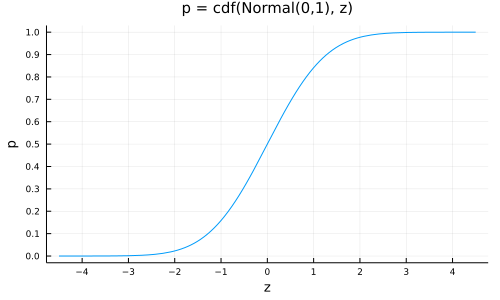

In [3]:
plot(z -> cdf(Normal(0,1), z), -4.5, 4.5; label="")
plot!(xtick=-10:10, ytick=0:0.1:1)
plot!(xguide="z", yguide="p")
title!("p = cdf(Normal(0,1), z)")

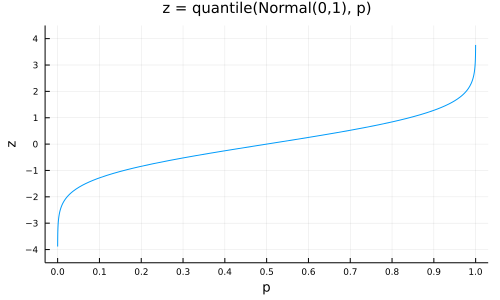

In [4]:
plot(p -> quantile(Normal(0,1), p), 0, 1; label="")
plot!(ylim=(-4.5, 4.5))
plot!(ytick=-10:10, xtick=0:0.1:1)
plot!(yguide="z", xguide="p")
title!("z = quantile(Normal(0,1), p)")

### 補累積分布函数 ccdf と補分位点函数 cquantile

$\ccdf(D, x) = 1 - \cdf(D, x) = P(X > x)$ を __補累積分布函数__ (complementary cumulative distribution function, __ccdf__) と呼ぶ.

補累積分布函数は単調減少函数になる.

補累積分布函数 $p = \ccdf(D, x) = 1 - \cdf(D, x)$ の逆函数を

$$
x = \cquantile(D, p) = \quantile(D, 1-p)
$$

と表し, __補分位点函数__ (complementary quantile function)と呼ぶ.

補分位点函数も単調減少函数になる.

例えば, 

$$
\cquantile(\op{Normal}(0,1), 0.05/2) = 1.95996398454\cdots \approx 1.96
$$

は非常に有名である.  実践的にはこれの値が $1.96$ にぴったり等しいとして扱って問題ない.

In [5]:
cquantile(Normal(0,1), 0.05/2)

1.9599639845400592

## WilsonのP値と信頼区間

WilsonのP値と信頼区間は二項分布の正規分布近似によって定義される.

### WilsonのP値

$k$ を二項分布 $\op{Binomial}(n,p)$ に従う確率変数とするとき,  

$$
\phat = \frac{k}{n}
$$

とおくと, $np$ と $n(1-p)$ が十分に大きいならば, 中心極限定理より次の近似が成立している:

$$
\frac{k - np}{\sqrt{np(1-p)}} = \frac{\phat - p}{\sqrt{p(1-p)/n}}
\sim \op{Normal}(0,1),\ \text{approximately}.
$$

これを用いて, データ「$n$ 回中当たりは $k$ 回」に関する「当たりが出る確率は $p$ である」という仮説の __WilsonのP値__ を次のように定義する:

$$
\pvalue_\op{Wilson}(k|n,p) =
    2\ccdf\left(\op{Normal}(0,1),\,
    \left|\frac{\phat - p}{\sqrt{p(1-p)/n}}\right|\right).
$$

### Wilsonの信頼区間

WilsonのP値に対応する信頼度 $1-\alpha$ の __Wilsonの信頼区間__

$$
\confint_\op{Wilson}(k|n,\alpha) =
\{\,p\mid \pvalue_\op{Wilson}(k|n,p)\ge\alpha\,\}
$$

がどうなるかを計算してみよう. これはP値函数から信頼区間がどのように得られるかを理解するために手頃な複雑さを持つ良い練習問題になっている.

$z_{\alpha/2}$ を次のように定義する:

$$
z_{\alpha/2} = \cquantile(\op{Normal}(0,1), \alpha/2).
$$

例えば, $\alpha=5\%$ のとき, $z = z_{5\%/2} \approx 1.96$ になることは非常に有名である. このとき

$$
\begin{aligned}
p\in \confint_\op{Wilson}(k|n,\alpha)
& \iff
\pvalue_\op{Wilson}(k|n,p)\ge\alpha
\\ & \iff
2\ccdf\left(\op{Normal}(0,1),\,
    \left|\frac{\phat - p}{\sqrt{p(1-p)/n}}\right|\right)
    \ge\alpha
\\ & \iff
\ccdf\left(\op{Normal}(0,1),\, \left|\frac{\phat - p}{\sqrt{p(1-p)/n}}\right|\right)
\ge \frac{\alpha}{2}
\\ & \iff
\left|\frac{\phat - p}{\sqrt{p(1-p)/n}}\right| \le
\cquantile\left(\op{Normal}(0,1), \frac{\alpha}{2}\right) = z_{\alpha/2}
\\ & \iff
\frac{(p - \phat)^2}{p(1-p)/n} \le z_{\alpha/2}^2
\\ & \iff
(p - \phat)^2 \le \frac{z_{\alpha/2}^2}{n} p(1-p)
\\ & \iff
\left(1 + \frac{z_{\alpha/2}^2}{n}\right)p^2 -
2\left(\phat + \frac{z_{\alpha/2}^2}{2n}\right)p +
\phat^2 \le 0.
\end{aligned}
$$

ゆえに, 

$$
a = 1 + \frac{z_{\alpha/2}^2}{n}, \quad
b = \phat + \frac{z_{\alpha/2}^2}{2n}, \quad
c = \phat^2
$$

とおき,

$$
p_\pm = \frac{b \pm \sqrt{b^2 - ac}}{a}
$$

とおくと, Wilsonの信頼区間は次のように表される:

$$
\confint_\op{Wilson}(k|n,\alpha) = [p_-, p_+].
$$

__注意:__ $f(p)$ を

$$
f(p) = \left(1 + \frac{z_{\alpha/2}^2}{n}\right)p^2 -
2\left(\phat + \frac{z_{\alpha/2}^2}{2n}\right)p +
\phat^2 =
ap^2 -2bp^2 + c
$$

とおくと,

$$
f(0) = \phat^2 \ge 0, \quad
f(1) = (1-\phat)^2 \ge 0
$$

となるので, Wilsonの信頼区間は区間 $[0,1]$ に自然に含まれることがわかる.

### WilsonのP値と信頼区間の実装例

In [6]:
function pvalue_wilson(k, n, p)
    p̂ = k/n
    se = √(p*(1 - p)/n)
    2ccdf(Normal(0,1), abs(p̂ - p)/se)
end

function confint_wilson(k, n, α)
    z = cquantile(Normal(0,1), α/2)
    p̂ = k/n
    a, b, c = 1 + z^2/n, p̂ + z^2/(2n), p̂^2
    sqrtD = √(b^2 - a*c)
    (b - sqrtD)/a, (b + sqrtD)/a
end

confint_wilson (generic function with 1 method)

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
ci = confint_wilson(k, n, α) |> collect = [0.10779126740630075, 0.6032218525388553]


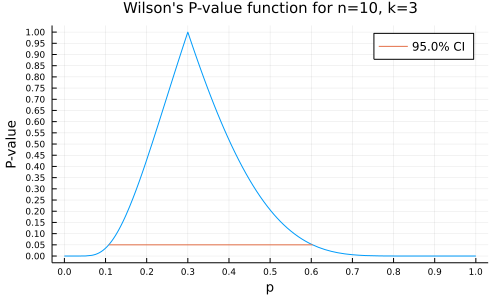

In [7]:
@show n, k, α = 10, 3, 0.05
@show ci = confint_wilson(k, n, α) |> collect

P_Wilson = plot(p -> pvalue_wilson(k, n, p), 0, 1; label="")
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(ci, fill(α,2); label="$(100(1-α))% CI")
title!("Wilson's P-value function for n=$n, k=$k")

このように信頼度 $1-\alpha$ の信頼区間はP値函数のグラフを高さ $\alpha$ で切断して得られる区間になる.

上のグラフは次のように解釈される.

* データ「$n=10$ 回中当たりが $k=3$ 回」と最も __相性がよい__ パラメータ値は $p=0.3$ である(点推定). 
* $0$ 近くの $p$ や $0.8$ 以上の $p$ は「$n=10$ 回中当たりが $k=3$ 回」というデータと __両立しない__.
* 閾値を $\alpha=5\%$ に定めておいて, P値が $\alpha$ 未満になったときに「パラメータ値とデータの数値が両立しなさすぎる」と判断することにしたとき, そのように判断されずにすむ $p$ の範囲はおおよそ $10.8\%$ から $60.3\%$ になる(信頼区間).

これが $95\%$ 信頼区間の穏健な(自信過剰にならずにすむ)解釈になる.

## WaldのP値と信頼区間

WaldのP値と信頼区間は, WilsonのP値と信頼区間の構成における二項分布における $\phat=k/n$ の分散 $p(1-p)/n$ をその推定値 $\phat(1-\phat)/n$ で置き換えることによって定義される.

これによって, WaldのP値と信頼区間の誤差はWilsonのP値と信頼区間よりも大きくなってしまう.

その代わりに, Waldの信頼区間はWilsonの信頼区間と違って二次方程式を解くことなく容易に計算可能になる.

### WaldのP値

データ「$n$ 回中当たりは $k$ 回」に関する「当たりが出る確率は $p$ である」という仮説の __WaldのP値__ を次のように定義する:

$$
\pvalue_\op{Wald}(k|n,p) =
    2\ccdf\left(\op{Normal}(0,1),\,
    \left|\frac{\phat - p}{\sqrt{\phat(1-\phat)/n}}\right|\right).
$$

### Waldの信頼区間

WaldのP値に対応する信頼度 $1-\alpha$ の __Waldの信頼区間__

$$
\confint_\op{Wald}(k|n,\alpha) =
\{\,p\mid \pvalue_\op{Wald}(k|n,p)\ge\alpha\,\}
$$

がどうなるかを計算してみよう.  以下のようにWilsonの信頼区間の場合よりもずっと簡単になる.

$$
\begin{aligned}
p\in \confint_\op{Wald}(k|n,\alpha)
& \iff
\pvalue_\op{Wald}(k|n,p)\ge\alpha
\\ & \iff
2\ccdf\left(\op{Normal}(0,1),\,
    \left|\frac{\phat - p}{\sqrt{\phat(1-\phat)/n}}\right|\right)
    \ge\alpha
\\ & \iff
\ccdf\left(\op{Normal}(0,1),\, \left|\frac{\phat - p}{\sqrt{\phat(1-\phat)/n}}\right|\right)
\ge \frac{\alpha}{2}
\\ & \iff
\left|\frac{\phat - p}{\sqrt{\phat(1-\phat)/n}}\right| \le
\cquantile\left(\op{Normal}(0,1), \frac{\alpha}{2}\right) = z_{\alpha/2}
\\ & \iff
\phat - z_{\alpha/2}\sqrt{\frac{p(1-p)}{n}} \le p \le \phat + z_{\alpha/2}\sqrt{\frac{p(1-p)}{n}}.
\end{aligned}
$$

すなわち,

$$
\confint_\op{Wald}(k|n,\alpha) =
\left[
\phat - z_{\alpha/2}\sqrt{\frac{p(1-p)}{n}},\;
\phat + z_{\alpha/2}\sqrt{\frac{p(1-p)}{n}}\,
\right].
$$

Waldの信頼区間は区間 $[0,1]$ をはみ出すこともある.

### WaldのP値と信頼区間の実装例

In [8]:
function pvalue_wald(k, n, p)
    p̂ = k/n
    sehat = √(p̂*(1 - p̂)/n)
    2ccdf(Normal(0,1), abs(p̂ - p)/sehat)
end

function confint_wald(k, n, α)
    z = cquantile(Normal(0,1), α/2)
    p̂ = k/n
    sehat = √(p̂*(1 - p̂)/n)
    p̂ - z*sehat, p̂ + z*sehat
end

confint_wald (generic function with 1 method)

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
ci = confint_wald(k, n, α) |> collect = [0.0159742349106739, 0.5840257650893261]


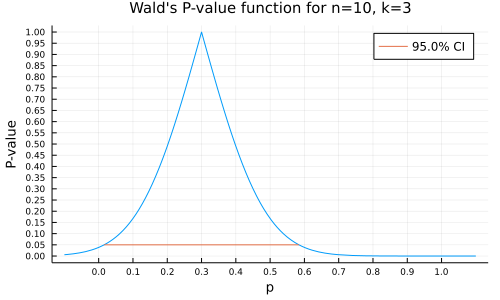

In [9]:
@show n, k, α = 10, 3, 0.05
@show ci = confint_wald(k, n, α) |> collect

P_Wald = plot(p -> pvalue_wald(k, n, p), -0.1, 1.1; label="")
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(ci, fill(α,2); label="$(100(1-α))% CI")
title!("Wald's P-value function for n=$n, k=$k")

WaldのP値函数は左右対称になり, 一般に台($0$ でない値を取る範囲)が区間 $[0,1]$ をはみ出す.

WaldのP値函数とそれに付随する信頼区間はこのように誤差が大きくなってしまうものだが, 信頼区間の計算が簡単になるという利点がある.

$np$ と $n(1-p)$ が非常に大きければ, Waldの信頼区間はWilsonの信頼区間とほぼぴったり一致するようになり, 二次方程式を解いてWilsonの信頼区間を求めるメリットはなくなる.

コンピュータで自動的に計算するならば, Wilsonの信頼区間の方を計算するべきだが, 暗算でどんぶり勘定したい場合にはWaldの信頼区間の方が便利である.

このように統計学的道具にはそれぞれ異なる利点と欠点があり, 適材適所で使い分けるのがよい.

## Clopper-PearsonのP値と信頼区間

二項分布における確率を正規分布で近似せずに正確に求めることによって定義されるP値と信頼区間の一種がClopper-PearsonのP値と信頼区間である.

### Clopper-PearsonのP値

データ「$n$ 回中当たりは $k$ 回」に関する「当たりが出る確率は $p$ である」という仮説の __Clopper-PearsonのP値__ を次のように定義する:

$$
\pvalue_\op{CP}(k|n,p) = \min
\begin{pmatrix}
1 \\
2\cdf(\op{Binomial}(n,p), k) \\
2\ccdf(\op{Binomial}(n,p), k-1) \\
\end{pmatrix}.
$$

ここで, $\cdf(\op{Binomial}(n,p), k)$ と $\ccdf(\op{Binomial}(n,p), k-1)$ はそれぞれ, 二項分布において $k$ 以下になる確率と $k$ 以下になる確率なので, この定義はおおよそ「片側検定のP値の2倍」になっている.  その定義のままだと $1$ より大きくなる場合があるので, $1$ 以下になるようにしてある. 

### 二項分布とベータ分布の関係

Clopper-PearsonのP値に対応する信頼度 $1-\alpha$ のClopper-Pearsonの信頼区間を計算するためには, 二項分布とベータ分布の素晴らしい関係が必要になる.  次が成立している:

$$
\begin{aligned}
&
\cdf(\op{Binomial}(n,p), k) = \ccdf(\op{Beta}(k+1, n-k), p) \quad (0\le k < n),
\\ &
\ccdf(\op{Binomial}(n,p), k-1) = \cdf(\op{Beta}(k, n-k+1), p) \quad (0 < k \le n).
\end{aligned}
$$

前者は後者で $k$ を $k+1$ に置き換えれば得られるので, 後者のみを示そう.

後者は具体的には次が成立するということを意味している:

$$
\sum_{i\ge k}\binom{n}{i}p^i(1-p)^{n-i} =
\frac{1}{B(k, n-k+1)}\int_0^p t^{k-1}(1-t)^{n-k}\,dt. 
$$

両辺の $p=0$ での値は $0$ になる. 

ゆえに両辺の $p$ に関する導函数が等しいことを示せば, 両辺が等しいことがわかる.

左辺を $p$ で微分すると以下のようになる:

$$
\begin{aligned}
\frac{\partial}{\partial p}
\sum_{i\ge k}\binom{n}{i}p^i(1-p)^{n-i}
& =
\sum_{i\ge k}\binom{n}{i}i p^{i-1}(1-p)^{n-i} -
\sum_{i\ge k}\binom{n}{i}(n-i) p^{i-1}(1-p)^{n-i-1}
\\ &=
\sum_{i\ge k}\frac{n!}{(i-1)!(n-i)!} p^{i-1}(1-p)^{n-i} -
\sum_{i\ge k}\frac{n!}{i!(n-i-1)!} p^{i-1}(1-p)^{n-i-1}
\\ &=
\sum_{i\ge k}\frac{n!}{(i-1)!(n-i)!} p^{i-1}(1-p)^{n-i} -
\sum_{i\ge k+1}\frac{n!}{(i-1)!(n-i)!} p^{i-1}(1-p)^{n-i-1}
\\ &=
\frac{n!}{(k-1)!(n-k)!} p^{k-1}(1-p)^{n-k}
\end{aligned}
$$

右辺を $p$ で微分すると

$$
\begin{aligned}
\frac{1}{B(k, n-k+1)}\frac{\partial}{\partial p}\int_0^p t^{k-1}(1-t)^{n-k}\,dt
&=
\frac{1}{B(k, n-k+1)} p^{k-1}(1-p)^{n-k}
\\ &=
\frac{\Gamma(k+(n-k+1)}{\Gamma(k)\Gamma(n-k+1)} p^{k-1}(1-p)^{n-k}
\\ &=
\frac{n!}{(k-1)!(n-k)!} p^{k-1}(1-p)^{n-k}.
\end{aligned}
$$

これで左辺と右辺の導函数が等しいことが証明された.

__注意:__ 二項分布の累積分布函数と補累積分布函数は素朴に和で実装するよりも, 上の公式を用いて, ベータ分布の補累積分布函数と累積分布函数で計算するようにした方が効率がよい.  ベータ分布の累積分布函数は regularized incomplete Beta function としてコンピュータの基本特殊函数ライブラリで効率的に実装されている.

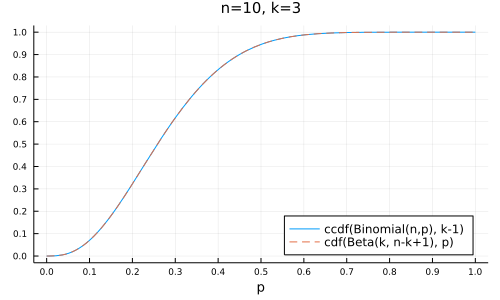

In [10]:
n, k = 10, 3
plot(p -> ccdf(Binomial(n,p), k-1);
    label="ccdf(Binomial(n,p), k-1)")
plot!(p -> cdf(Beta(k, n-k+1), p), 0, 1;
    label="cdf(Beta(k, n-k+1), p)", ls=:dash)
plot!(legend=:bottomright)
plot!(xguide="p")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
title!("n=$n, k=$k")

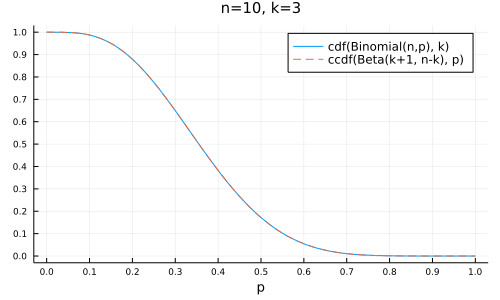

In [11]:
n, k = 10, 3
plot(p -> cdf(Binomial(n,p), k);
    label="cdf(Binomial(n,p), k)")
plot!(p -> ccdf(Beta(k+1, n-k), p), 0, 1;
    label="ccdf(Beta(k+1, n-k), p)", ls=:dash)
plot!(legend=:topright)
plot!(xguide="p")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
title!("n=$n, k=$k")

### Clopper-Pearsonの信頼区間

Clopper-PearsonのP値に対応する信頼度 $1-\alpha$ の __Clopper-Pearsonの信頼区間__

$$
\confint_\op{CP}(k|n,\alpha) =
\{\,p\mid \pvalue_\op{CP}(k|n,p)\ge\alpha\,\}
$$

がどうなるかを計算してみよう. 

$$
\begin{aligned}
&
p\in \confint_\op{CP}(k|n,\alpha)
\\ & \iff
\pvalue_\op{CP}(k|n,p)\ge\alpha
\\ & \iff
\cdf(\op{Binomial}(n,p), k) \ge \alpha/2 \;\text{and}\;
\ccdf(\op{Binomial}(n,p), k-1) \ge \alpha/2
\\ & \iff
\ccdf(\op{Beta}(k+1, n-k), p) \ge \alpha/2 \;\text{and}\;
\cdf(\op{Beta}(k, n-k+1), p) \ge \alpha/2
\\ & \iff
p \le \cquantile(\op{Beta}(k+1, n-k), \alpha/2) \;\text{and}\;
p \ge \quantile(\op{Beta}(k, n-k+1), \alpha/2),
\end{aligned}
$$

ゆえに

$$
p_L = \quantile(\op{Beta}(k, n-k+1), \alpha/2), \quad
p_U = \cquantile(\op{Beta}(k+1, n-k), \alpha/2)
$$

とおくと,

$$
\confint_\op{CP}(k|n,\alpha) = [p_L, p_U].
$$

### Clopper-PearsonのP値と信頼区間の実装例

In [12]:
function pvalue_cp(k, n, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

function confint_cp(k, n, α)
    quantile(Beta(k, n-k+1), α/2), cquantile(Beta(k+1, n-k), α/2)
end

confint_cp (generic function with 1 method)

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
ci = confint_cp(k, n, α) |> collect = [0.06673951117773438, 0.6524528500599971]


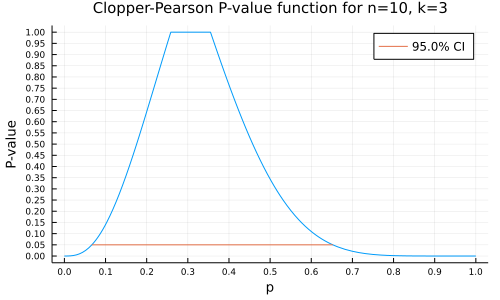

In [13]:
@show n, k, α = 10, 3, 0.05
@show ci = confint_cp(k, n, α) |> collect

P_CP = plot(p -> pvalue_cp(k, n, p), 0, 1; label="")
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(ci, fill(α,2); label="$(100(1-α))% CI")
title!("Clopper-Pearson P-value function for n=$n, k=$k")

Clopper-Pearsonの信頼区間は小さめの $n$ については過剰に保守的になることが多い.

しかし, 上のコードを見れば分かるように, 実装は極めてシンプルである.

そして, さらにデータが二項分布 $\op{Binomial}(n,p)$ に従ってランダムに生成されているとき, P値が $\alpha$ 以下になる確率が確実に $\alpha$ 以下になってくれるという利点もある.

## SterneのP値と信頼区間

SterneのP値と信頼区間も, 二項分布における確率を正規分布で近似せずに正確に求めることによって定義される.  Sterneの信頼区間の方がClopper-Pearsonの信頼区間よりも概ね狭くなってくれるという利点があるが, Clopper-Pearsonの信頼区間の場合と違ってシンプルな公式がないので, 実装はかなり面倒になる.

### SterneのP値と信頼区間

データ「$n$ 回中当たりは $k$ 回」に関する「当たりが出る確率は $p$ である」という仮説の __SterneのP値__ を次のように定義する:

$$
\pvalue_\op{Sterne}(k|n,p) = \sum_{P(i|n,p) \le P(k|n,p)} P(i|n,p).
$$

ここで,

$$
P(i|n,p) = \binom{n}{i} p^i (1-p)^{n-i} \quad (i=0,1,\ldots,n).
$$

SterneのP値は二項分布 $\op{Binomial}(n,p)$ 内でデータの数値よりも生じる確率が低い値の確率の総和になる.

これに対応するSterneの信頼区間は

$$
\confint_\op{Sterne}(k|n,\alpha) =
\{\,p\mid \pvalue_\op{Sterne}(k|n,p)\ge\alpha\,\}
$$

であるが, この定義のままだと区間にならない場合があるので, 実装時にはこの集合を含む最小の区間として実装することにする.

### SterneのP値と信頼区間の実装例

効率的でない実装でよいならば, P値函数の定義は,

In [14]:
x ⪅ y = x < y || x ≈ y

function pvalue_sterne_naive(k, n, p)
    bin = Binomial(n, p)
    sum(pdf(bin, i) for i in support(bin) if pdf(bin, i) ⪅ pdf(bin, k))
end

pvalue_sterne_naive (generic function with 1 method)

で十分だが, 次のセルのように計算は非常に遅くなる.

In [15]:
@time pvalue_sterne_naive(3*10^6, 10*10^6, 0.301)
@time pvalue_sterne_naive(3*10^6, 10*10^6, 0.301)
@time pvalue_sterne_naive(3*10^6, 10*10^6, 0.301)

  2.982381 seconds
  3.007138 seconds
  3.026064 seconds


5.354898851685295e-12

In [16]:
x ⪅ y = x < y || x ≈ y

_pdf_le(x, (dist, y)) =  pdf(dist, x) ⪅ y

function _search_boundary(f, x0, Δx, param)
    x = x0
    if f(x, param)
        while f(x - Δx, param) x -= Δx end
    else
        x += Δx
        while !f(x, param) x += Δx end
    end
    x
end

function pvalue_sterne(dist::DiscreteUnivariateDistribution, x)
    Px = pdf(dist, x)
    Px == 0 && return Px
    Px == 1 && return Px
    m = mode(dist)
    Px ≈ pdf(dist, m) && return one(Px)
    if x < m
        y = _search_boundary(_pdf_le, 2m - x, 1, (dist, Px))
        cdf(dist, x) + ccdf(dist, y-1)
    else # x > m
        y = _search_boundary(_pdf_le, 2m - x, -1, (dist, Px))
        cdf(dist, y) + ccdf(dist, x-1)
    end
end

function pvalue_sterne(k, n, p)
    pvalue_sterne(Binomial(n, p), k)
end

function confint_sterne(k, n, α)
    a, b = confint_cp(k, n, α/10)
    ps = find_zeros(a-√eps(), b+√eps()) do p
        logit(0 < p ≤ 1 ? pvalue_sterne(k, n, p) : zero(p)) - logit(α)
    end
    first(ps), last(ps)
end

confint_sterne (generic function with 1 method)

In [17]:
@time pvalue_sterne(3*10^6, 10*10^6, 0.301)
@time pvalue_sterne(3*10^6, 10*10^6, 0.301)
@time pvalue_sterne(3*10^6, 10*10^6, 0.301)

  0.000049 seconds (8 allocations: 1.875 KiB)
  0.000010 seconds (8 allocations: 1.875 KiB)
  0.000013 seconds (8 allocations: 1.875 KiB)


5.354898860502031e-12

In [18]:
@time confint_sterne(3*10^6, 10*10^6, 0.001)
@time confint_sterne(3*10^6, 10*10^6, 0.001)
@time confint_sterne(3*10^6, 10*10^6, 0.001)

  0.142895 seconds (51.68 k allocations: 3.764 MiB, 98.03% compilation time)
  0.002759 seconds (11.48 k allocations: 2.402 MiB)
  0.003139 seconds (11.48 k allocations: 2.402 MiB)


(0.2995232976841354, 0.30047704792862706)

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
ci = confint_sterne(k, n, α) |> collect = [0.0872644339141502, 0.6194106589132863]


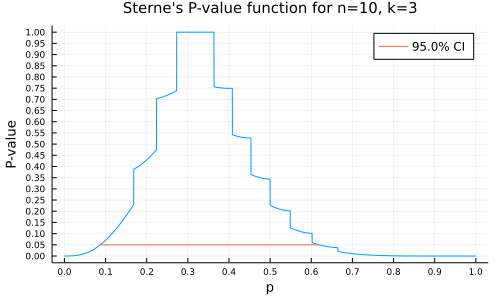

In [19]:
@show n, k, α = 10, 3, 0.05
@show ci = confint_sterne(k, n, α) |> collect

P_Sterne = plot(p -> pvalue_sterne(k, n, p), 0, 1; label="")
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(ci, fill(α,2); label="$(100(1-α))% CI")
title!("Sterne's P-value function for n=$n, k=$k")

## 4種のP値函数と信頼区間を同時にプロット

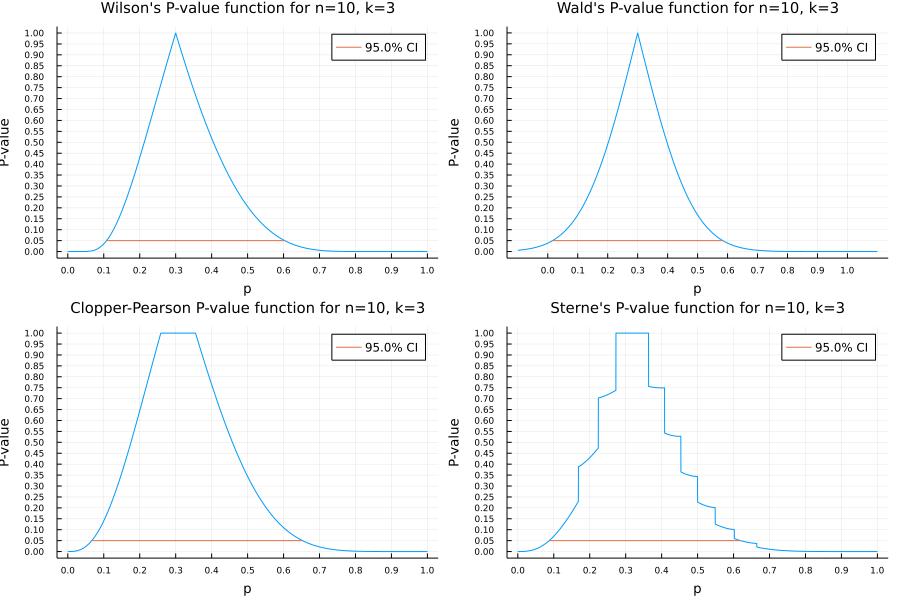

In [20]:
plot(P_Wilson, P_Wald, P_CP, P_Sterne;
    layout=(2, 2), size=(900, 600))

## ベイズ統計での信用区間に対応するP値函数

P値函数と区間推定の表裏一体性については, 私のツイログの検索を参照せよ:

* [P値 信頼区間 表裏一体](https://twilog.org/genkuroki/search?word=P%E5%80%A4%20%E4%BF%A1%E9%A0%BC%E5%8C%BA%E9%96%93%20%E8%A1%A8%E8%A3%8F%E4%B8%80%E4%BD%93&ao=a)

区間推定の方法には, 通常の信頼区間以外にも, ベイズ統計の __信用区間__ (credible interval, 確信区間)の方法もある.

ゆえに, P値函数と区間推定の表裏一体性より, ベイズ統計の方法を使っても, P値函数を構成することができる.

ベイズ版のP値函数と通常のP値函数を比較したい.

### 二項分布モデルのHDI版信用区間

簡単のため共役事前分布の場合のみを扱おう.

二項分布モデルのベイズ統計では以下の手続きでパラメータ $p$ の事後分布が得られる.

(1) パラメータ $p$ の事前分布 $\op{prior}=\op{Beta}(a, b)$ ($a,b>0$)を任意に用意する.

(2) 「$n$ 回中当たりが $k$ 回」の型のデータを取得する.

(3) パラメータ $p$ の事後分布 $\op{posterior}=\op{Beta}(k+a, n-k+b)$ が得られる.

この手続きの中身については任意のベイズ統計に関する教科書を参照せよ.

このとき, パラメータ $p$ に関する $100(1-\alpha)\%$ 信用区間が次のように定義される.

(4) 事後分布を

$[0,1]$ に含まれる区間 $[p_L, p_U]$ で事後分布で測ったその区間に含まれる確率が

$$
\cdf(\op{posterior}, p_U) - \cdf(\op{posterior}, p_L) = 1 - \alpha
$$

となるものの中で長さ $p_U - p_L$ が最小のものを highest density interval (HDI)として定義された信用度 $1-\alpha$ の __信用区間__ と呼び, 次のように表す:

$$
\credint_\op{HDI}(k|n,p,a,b) = [p_L, p_U].
$$

ベータ分布の確率密度函数を

$$
\pdf(\op{Beta}(a,b), t) = \frac{1}{B(a,b)} t^{a-1}(1-t)^{b-1} 
$$

と書くと, HDI版信用区間 $[p_L, p_U]$ について,

$$
\pdf(\op{Beta}(k+a, n-k+b), p_L) =
\pdf(\op{Beta}(k+a, n-k+b), p_U)
$$

が成立しており, この条件と上の確率に関する条件でHDI版信用区間は一意に特徴付けられる.

__注意:__ 実際の実装では,

$$
p_L = \quantile(\op{posterior}, t), \quad
p_U = \quantile(\op{posterior}, t + (1 - α))
$$

のあいだの長さ,

$$
f(t) = p_U - p_L =
\quantile(\op{posterior}, t + (1 - α)) - \quantile(\op{posterior}, t)
$$

を最小化する $t$ を求め, それに対応する区間 $[p_L, p_U]$ としてHDI版信用区間を計算する.

### HDI版信用区間に対応するP値函数

HDI版信用区間に対応するP値函数 $\pvalue_\op{HDI}(k|n,p,a,b)$ は以下のように定義される.

与えられた値 $p$ に対して, $t$ に関する方程式

$$
\pdf(\op{Beta}(k+a, n-k+b), t) =
\pdf(\op{Beta}(k+a, n-k+b), p)
$$

の2つの解を $p_L\le p_U$ と書き, 

$$
\pvalue_\op{HDI}(k|n,p,a,b) =
\cdf(\op{Beta}(k+a, n-k+b), p_L) + 
\ccdf(\op{Beta}(k+a, n-k+b), p_U).
$$

これを, __ベイズ版P値函数__ (Bayesian P-value function)のHDI版と呼ぶ.

### HDI版の信用区間とそれに対応するベイズ版P値函数の実装例

In [27]:
function hdi(dist::ContinuousUnivariateDistribution, α = 0.05; alg = Brent())
    f(p) = quantile(dist, p + (1 - α)) - quantile(dist, p)
    o = optimize(f, 0, α, alg)
    p = o.minimizer
    quantile.(dist, (p, p + (1 - α)))
end

function pvalue_hdi(dist::ContinuousUnivariateDistribution, x₀; xlim = extrema(dist))
    p₀ = pdf(dist, x₀)
    m = mode(dist)
    f(x) = pdf(dist, x) - p₀
    if x₀ == m
        1.0
    elseif x₀ > m
        x₁ = find_zero(f, (xlim[begin], m))
        cdf(dist, x₁) + ccdf(dist, x₀)
    else
        x₁ = find_zero(f, (m, xlim[end]))
        cdf(dist, x₀) + ccdf(dist, x₁)
    end
end

function pvalue_hdi(k, n, p; a=1, b=1)
    posterior = Beta(k+a, n-k+b)
    pvalue_hdi(posterior, p)
end

function credint_hdi(k, n, α; a=1, b=1)
    posterior = Beta(k+a, n-k+b)
    hdi(posterior, α)
end

credint_hdi (generic function with 1 method)

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
(a, b) = (1, 1) = (1, 1)
ci = credint_hdi(k, n, α; a, b) |> collect = [0.09337233320249291, 0.5879525593275807]


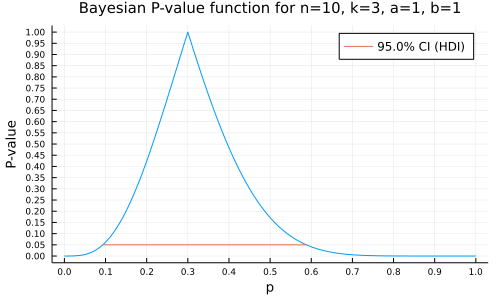

In [30]:
@show n, k, α = 10, 3, 0.05
@show a, b = 1, 1
@show ci = credint_hdi(k, n, α; a, b) |> collect

P_HDI = plot(p -> pvalue_hdi(k, n, p; a, b), 0, 1; label="")
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(ci, fill(α,2); label="$(100(1-α))% CI (HDI)")
title!("Bayesian P-value function for n=$n, k=$k, a=$a, b=$b")

このグラフも通常のP値函数と信頼区間と同様に,

* データの数値とパラメータ値の相性の良さ(両立性, compatibility)

を表すグラフだと解釈可能である. この解釈は次の事後分布のグラフにもそのまま一般化される.

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
(a, b) = (1, 1) = (1, 1)
ci = credint_hdi(k, n, α; a, b) |> collect = [0.09337233320249291, 0.5879525593275807]


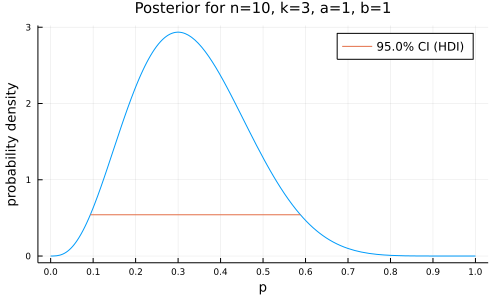

In [31]:
@show n, k, α = 10, 3, 0.05
@show a, b = 1, 1
@show ci = credint_hdi(k, n, α; a, b) |> collect

f(p) = pdf(Beta(k+a, n-k+b), p)
Q_HDI = plot(f, 0, 1; label="")
plot!(xguide="p", yguide="probability density")
plot!(xtick=0:0.1:1)
plot!(ci, fill(f(ci[end]), 2); label="$(100(1-α))% CI (HDI)")
title!("Posterior for n=$n, k=$k, a=$a, b=$b")

### WilsonのP値函数とベイズ版P値函数のHDI版の比較

この節の目的は通常のP値函数とベイズ版P値函数を比較することであった.

以下では, 通常のP値函数の代表例としてWilsonのP値函数を選び, ベイズ版P値函数の代表例として一様事前分布 $\op{Beta}(1,1)$ から得られるベイズ版P値函数を選んで比較することにする.

上のベイズ版P値函数をWilsonのP値函数と重ねてプロットしてみよう.

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
(a, b) = (1, 1) = (1, 1)


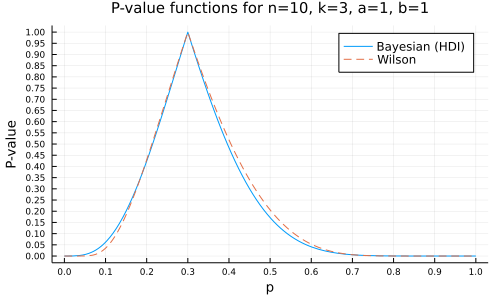

In [32]:
@show n, k, α = 10, 3, 0.05
@show a, b = 1, 1

plot(p -> pvalue_hdi(k, n, p; a, b), 0, 1; label="Bayesian (HDI)")
plot!(p -> pvalue_wilson(k, n, p); label="Wilson", ls=:dash)
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value functions for n=$n, k=$k, a=$a, b=$b")

ベイズ版P値函数が通常のWilsonのP値函数によく一致していることが確認された.

$n$, $k$ を大きくすると違いはさらに小さくなる.

(n, k, α) = (30, 9, 0.05) = (30, 9, 0.05)
(a, b) = (1, 1) = (1, 1)


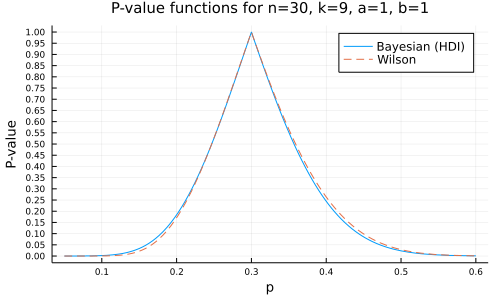

In [33]:
@show n, k, α = 30, 9, 0.05
@show a, b = 1, 1

plot(p -> pvalue_hdi(k, n, p; a, b), 0.05, 0.6; label="Bayesian (HDI)")
plot!(p -> pvalue_wilson(k, n, p); label="Wilson", ls=:dash)
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value functions for n=$n, k=$k, a=$a, b=$b")

(n, k, α) = (100, 30, 0.05) = (100, 30, 0.05)
(a, b) = (1, 1) = (1, 1)


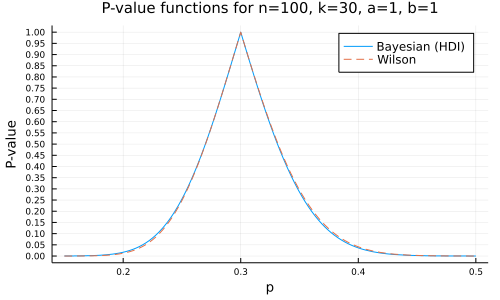

In [34]:
@show n, k, α = 100, 30, 0.05
@show a, b = 1, 1

plot(p -> pvalue_hdi(k, n, p; a, b), 0.15, 0.5; label="Bayesian (HDI)")
plot!(p -> pvalue_wilson(k, n, p); label="Wilson", ls=:dash)
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value functions for n=$n, k=$k, a=$a, b=$b")

$n=100$, $k=30$ ではほぼぴったり重なっている!

### ETI版の信用区間とそれに対応するP値函数

HDI版ではなく, equal tailed interval (ETI)版の信用区間も定義しておこう:

$$
\credint_\op{ETI}(k|n,p,a,b) =
\left[
\quantile(\op{posterior}, \alpha/2),\;
\cquantile(\op{posterior}, \alpha/2),
\right].
$$

ここで, $\op{posterior} = \op{Beta}(k+a, n-k+b)$.

これに対応するP値函数は次になる:

$$
\pvalue_\op{ETI}(k|n,p,a,b) = \min\begin{pmatrix}
1 \\
2\cdf(\op{posterior}, p) \\
2\ccdf(\op{posterior}, p) \\
\end{pmatrix}.
$$

### ETI版の信用区間とそれに対応するベイズ版P値函数の実装例

In [29]:
function pvalue_eti(k, n, p; a=1/2, b=1/2)
    posterior = Beta(k+a, n-k+a)
    min(1, 2cdf(posterior, p), 2ccdf(posterior, p))
end

function credint_eti(k, n, α; a=1/2, b=1/2)
    posterior = Beta(k+a, n-k+a)
    quantile(posterior, α/2), cquantile(posterior, α/2)
end

credint_eti (generic function with 1 method)

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
(a, b) = (1 / 2, 1 / 2) = (0.5, 0.5)
ci = credint_eti(k, n, α; a, b) |> collect = [0.09269459393815314, 0.6058183181486713]


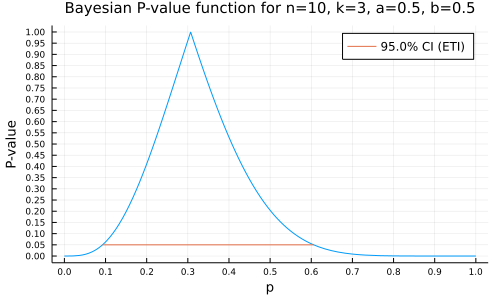

In [38]:
@show n, k, α = 10, 3, 0.05
@show a, b = 1/2, 1/2
@show ci = credint_eti(k, n, α; a, b) |> collect

P_ETI = plot(p -> pvalue_eti(k, n, p; a, b), 0, 1; label="")
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(ci, fill(α,2); label="$(100(1-α))% CI (ETI)")
title!("Bayesian P-value function for n=$n, k=$k, a=$a, b=$b")

### WilsonのP値函数とベイズ版P値函数のETI版の比較

ベイズ版P値函数のETI版は, Jeffreys事前分布 $\op{Beta}(1/2, 1/2)$ の場合にWilsonのP値とよく一致することを確認しよう.

Jeffreys事前分布は一様事前分布と共に __無情報事前分布__ の代表例である.

(n, k, α) = (10, 3, 0.05) = (10, 3, 0.05)
(a, b) = (1 / 2, 1 / 2) = (0.5, 0.5)


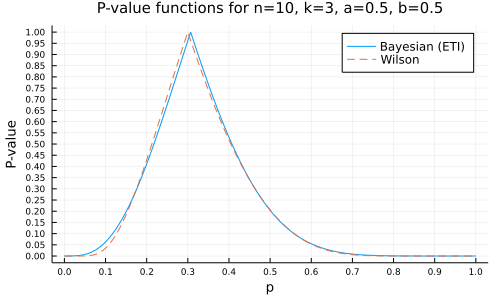

In [37]:
@show n, k, α = 10, 3, 0.05
@show a, b = 1/2, 1/2

plot(p -> pvalue_eti(k, n, p; a, b), 0, 1; label="Bayesian (ETI)")
plot!(p -> pvalue_wilson(k, n, p); label="Wilson", ls=:dash)
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value functions for n=$n, k=$k, a=$a, b=$b")

(n, k, α) = (30, 9, 0.05) = (30, 9, 0.05)
(a, b) = (1 / 2, 1 / 2) = (0.5, 0.5)


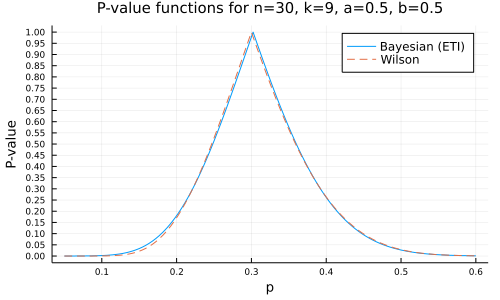

In [40]:
@show n, k, α = 30, 9, 0.05
@show a, b = 1/2, 1/2

plot(p -> pvalue_eti(k, n, p; a, b), 0.05, 0.6; label="Bayesian (ETI)")
plot!(p -> pvalue_wilson(k, n, p); label="Wilson", ls=:dash)
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value functions for n=$n, k=$k, a=$a, b=$b")

(n, k, α) = (100, 30, 0.05) = (100, 30, 0.05)
(a, b) = (1 / 2, 1 / 2) = (0.5, 0.5)


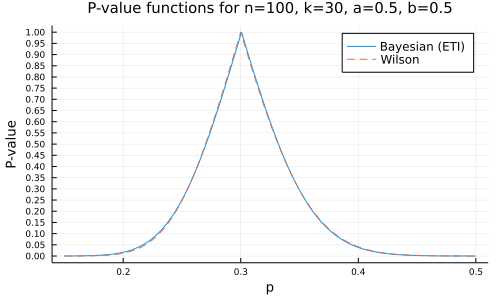

In [42]:
@show n, k, α = 100, 30, 0.05
@show a, b = 1/2, 1/2

plot(p -> pvalue_eti(k, n, p; a, b), 0.15, 0.5; label="Bayesian (ETI)")
plot!(p -> pvalue_wilson(k, n, p); label="Wilson", ls=:dash)
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
title!("P-value functions for n=$n, k=$k, a=$a, b=$b")

$n=100$, $k=30$ ではほぼぴったり重なっている!

### 道具を主義の色眼鏡で見ることの不合理性

所謂「ベイズ主義」にこだわったベイズ統計の解説では, 通常の信頼区間とベイズ版の信用区間は解釈が異なり, まったく違うものであるかのように説明されている.

しかし, 上で確認したように, 二項分布モデルのような統計学入門の教科書でよく説明されているシンプルなモデルの場合には, ベイズ版の信用区間は通常の信頼区間と実用的には区別する必要がないほどよく一致する.

そのことは, 対応するP値函数がよく一致することと数学的には同値である.

むしろ, 通常の4種のP値函数のあいだの違いの方が, ベイズ版P値函数とWilsonのP値函数の違いよりも大きいと言える.

この事実は, ベイズ版信用区間が通常の信頼区間の近似計算法だとみなせ, 逆に, 通常の信頼区間は無情報事前分布のベイズ版信用区間の近似計算法だとみなせることを意味している.

実践的には「同じもの」とみなしても害がないのに, 主義の違いによって異なる解釈を強制しようとすることは, 「かけ算の意味によって, 3×4は正解だが, 4×3は誤りになる」と教えている困った人達と同じ立場に立つことになる.

そういうことはもうやめた方がよいだろう.

「シンプルなモデルにおいては無情報事前分布のベイズ統計と通常のP値を使う方法は実践的には同等だとみなされる」という事実を理解して, 使える道具の幅を気軽に広げた方が生産的だと思われる.